# Assignment 2

Due Date:  11:59pm on Friday, October 2nd (for now)

## Question 1 - Fitting Part Deux

In the Jupyter Notebook called Fitting_Examples.ipynb, the last few examples considered cases where the uncertainty in the data became
larger at small x-values.  We considered three scenarios for collecting
the data - one where we focused on small x-values, and two others that covered larger ranges of x.

For this question, begin with the Jupyter Notebook above, and modify it
to consider 10 x-value ranges that keep the minimum value of the range constant (and fairly close to zero) while varying the maximum x-value from small to larger values.  For each x-value range, calculate the uncertainty in the y-intercept, and then create a plot of the uncertainty as a function of that maximum x-value of the range.

Now, consider keeping the maximum x-value of the range constant, and vary the minimum value of the range from a small value, close to zero, to a larger value that is close to the maximum value.  Create a plot of the
uncertainty in the y-intercept as a function of the minimum x-value of the range.

What can you conclude from this study about the optimal experiment design?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

#x - range 1
npts = 11
xlow = 0.5
xhigh = 1.5

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

plt.plot(xi,yi,'o')

Coefficients (from curve_fit)
[0.12016943 0.98042418]
Covariance Matrix (from curve_fit)
[[ 0.06133107 -0.05575552]
 [-0.05575552  0.05575552]]

Final Result: y = (0.98 +/- 0.24) x + (0.12 +/- 0.25)


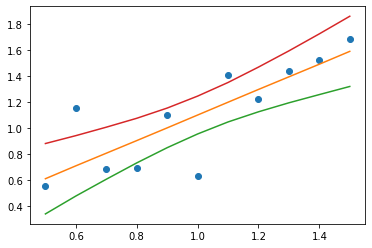

In [2]:
from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')


In [3]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,0.980424,0.236126,0.120169,0.247651


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

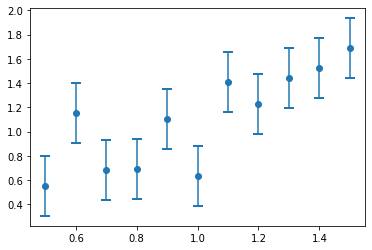

In [4]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

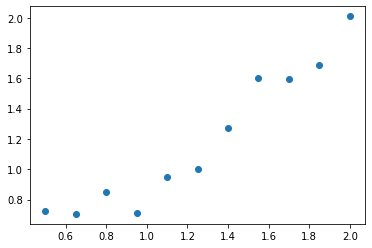

In [5]:
#x - range 2
npts = 11
xlow = 0.5
xhigh = 2

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

plt.plot(xi,yi,'o')

Coefficients (from curve_fit)
[0.07765423 0.890923  ]
Covariance Matrix (from curve_fit)
[[ 0.01491711 -0.01043155]
 [-0.01043155  0.00834524]]

Final Result: y = (0.89 +/- 0.09) x + (0.08 +/- 0.12)


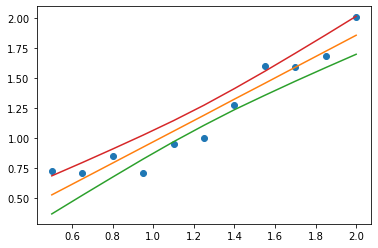

In [6]:
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')

In [7]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,0.890923,0.091352,0.077654,0.122136


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

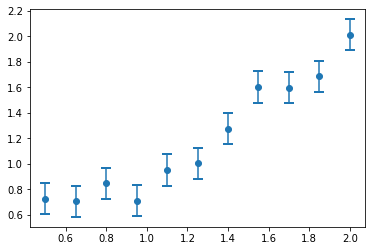

In [8]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

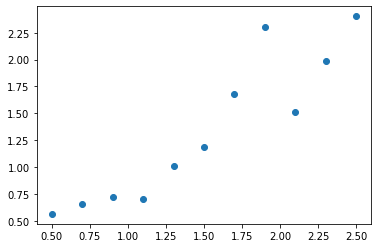

In [9]:
#x - range 3
npts = 11
xlow = 0.5
xhigh = 2.5

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

plt.plot(xi,yi,'o')

Coefficients (from curve_fit)
[-0.07878272  0.94506941]
Covariance Matrix (from curve_fit)
[[ 0.04682914 -0.02650706]
 [-0.02650706  0.01767137]]

Final Result: y = (0.95 +/- 0.13) x + (-0.08 +/- 0.22)


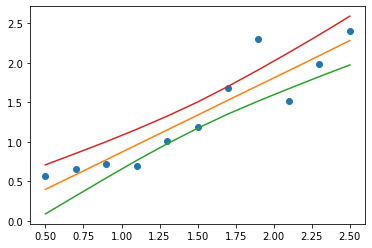

In [10]:
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')

In [11]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,0.945069,0.132934,-0.078783,0.2164


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

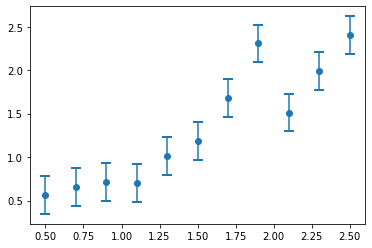

In [12]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

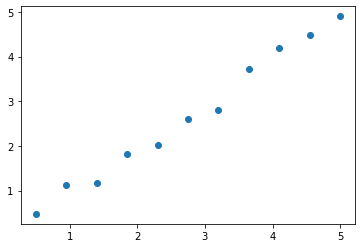

In [13]:
#x - range 4
npts = 11
xlow = 0.5
xhigh = 5

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

plt.plot(xi,yi,'o')

Coefficients (from curve_fit)
[-0.068962    0.99365609]
Covariance Matrix (from curve_fit)
[[ 0.01444731 -0.00414395]
 [-0.00414395  0.00150689]]

Final Result: y = (0.99 +/- 0.04) x + (-0.07 +/- 0.12)


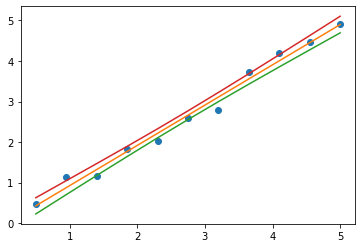

In [14]:
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')

In [15]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,0.993656,0.038819,-0.068962,0.120197


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

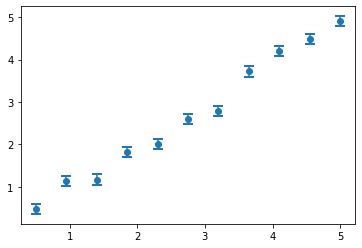

In [16]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

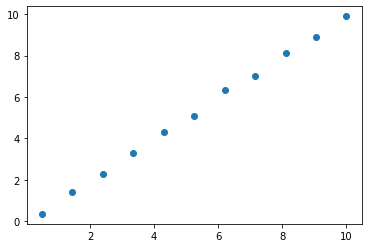

In [17]:
#x - range 5
npts = 11
xlow = 0.5
xhigh = 10

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

plt.plot(xi,yi,'o')

Coefficients (from curve_fit)
[-0.07639537  1.00239278]
Covariance Matrix (from curve_fit)
[[ 0.00384673 -0.00055197]
 [-0.00055197  0.00010514]]

Final Result: y = (1.00 +/- 0.01) x + (-0.08 +/- 0.06)


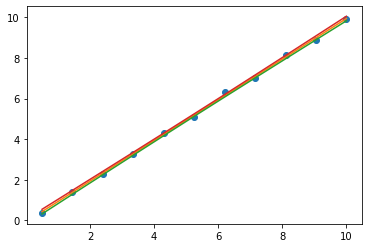

In [18]:
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')

In [19]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,1.002393,0.010254,-0.076395,0.062022


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

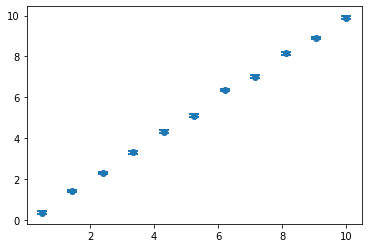

In [20]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

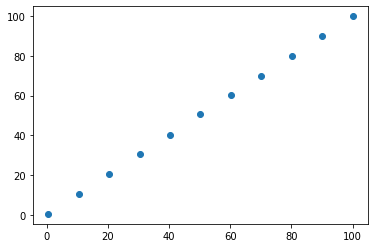

In [21]:
#x - range 6
npts = 11
xlow = 0.5
xhigh = 100

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

plt.plot(xi,yi,'o')

Coefficients (from curve_fit)
[-0.0778141   1.00111655]
Covariance Matrix (from curve_fit)
[[ 7.32683854e-03 -1.04741121e-04]
 [-1.04741121e-04  2.08440106e-06]]

Final Result: y = (1.00 +/- 0.00) x + (-0.08 +/- 0.09)


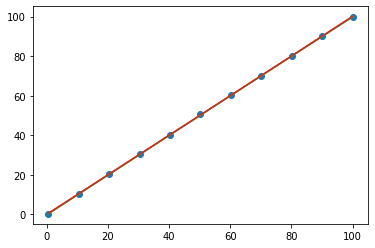

In [22]:
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')

In [23]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,1.001117,0.001444,-0.077814,0.085597


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

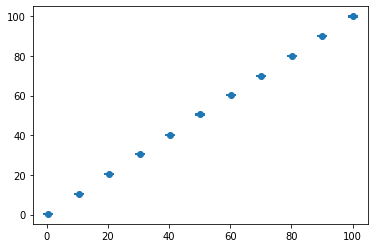

In [24]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

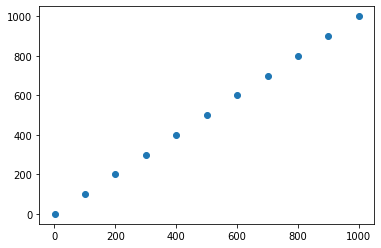

In [25]:
#x - range 7
npts = 11
xlow = 0.5
xhigh = 1000

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

plt.plot(xi,yi,'o')

Coefficients (from curve_fit)
[0.01546926 0.99977302]
Covariance Matrix (from curve_fit)
[[ 5.13867171e-03 -7.34025406e-06]
 [-7.34025406e-06  1.46733300e-08]]

Final Result: y = (1.00 +/- 0.00) x + (0.02 +/- 0.07)


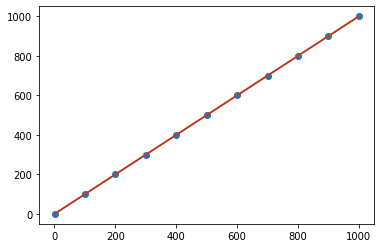

In [26]:
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')

In [27]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,0.999773,0.000121,0.015469,0.071685


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

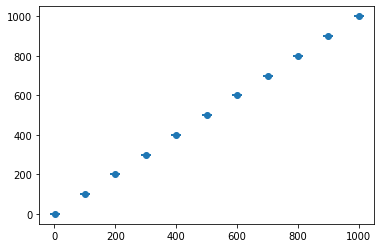

In [28]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

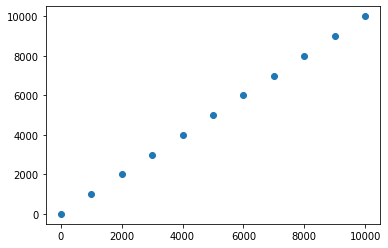

In [29]:
#x - range 8
npts = 11
xlow = 0.5
xhigh = 10000

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

plt.plot(xi,yi,'o')

Coefficients (from curve_fit)
[-0.05724721  0.99998961]
Covariance Matrix (from curve_fit)
[[ 6.61163231e-03 -9.44502343e-07]
 [-9.44502343e-07  1.88887211e-10]]

Final Result: y = (1.00 +/- 0.00) x + (-0.06 +/- 0.08)


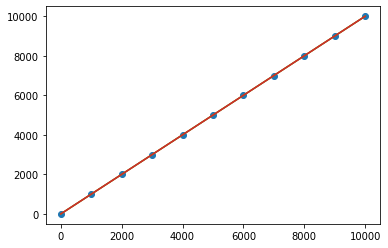

In [30]:
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')

In [31]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,0.99999,0.000014,-0.057247,0.081312


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

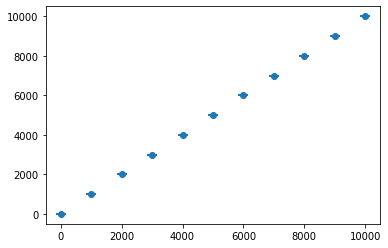

In [32]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

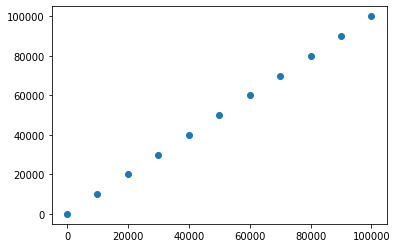

In [33]:
#x - range 9
npts = 11
xlow = 0.5
xhigh = 100000

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

plt.plot(xi,yi,'o')

Coefficients (from curve_fit)
[-0.11094088  0.99999996]
Covariance Matrix (from curve_fit)
[[ 2.62731986e-02 -3.76168717e-07]
 [-3.76168717e-07  7.52574622e-12]]

Final Result: y = (1.00 +/- 0.00) x + (-0.11 +/- 0.16)


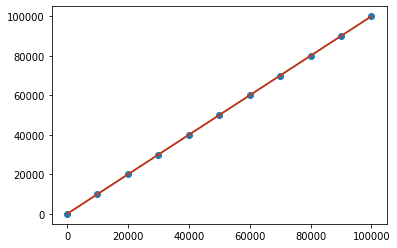

In [34]:
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')

In [35]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,1.0,0.000003,-0.110941,0.16209


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

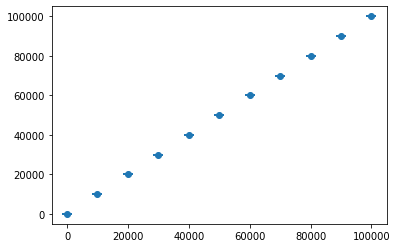

In [36]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

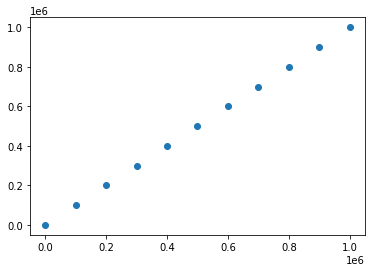

In [37]:
#x - range 10
npts = 11
xlow = 0.5
xhigh = 1000000

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

plt.plot(xi,yi,'o')

Coefficients (from curve_fit)
[0.10523318 0.99999986]
Covariance Matrix (from curve_fit)
[[ 7.33077635e-03 -1.07968773e-08]
 [-1.07968773e-08  2.16921872e-14]]

Final Result: y = (1.00 +/- 0.00) x + (0.11 +/- 0.09)


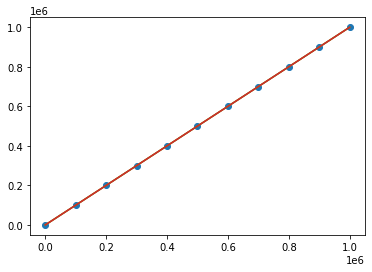

In [38]:
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')

In [39]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,1.0,1.472827e-07,0.105233,0.08562


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

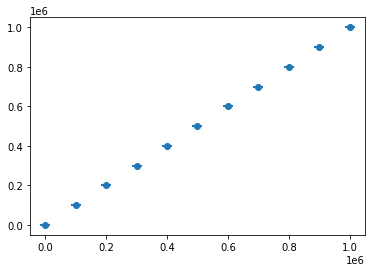

In [40]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

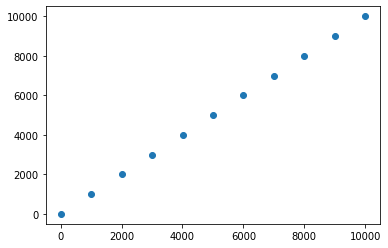

In [41]:
#x - range 11
npts = 11
xlow = 5
xhigh = 10000

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

plt.plot(xi,yi,'o')

Coefficients (from curve_fit)
[0.14112071 0.99999081]
Covariance Matrix (from curve_fit)
[[ 1.58565867e-02 -2.26531096e-06]
 [-2.26531096e-06  4.52826845e-10]]

Final Result: y = (1.00 +/- 0.00) x + (0.14 +/- 0.13)


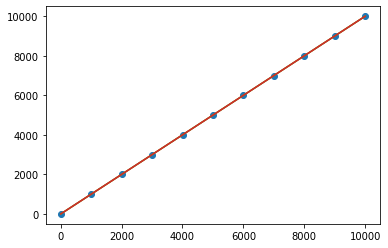

In [42]:
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')

In [43]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,0.999991,0.000021,0.141121,0.125923


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

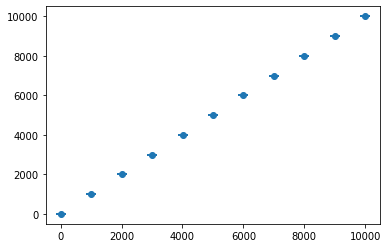

In [44]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

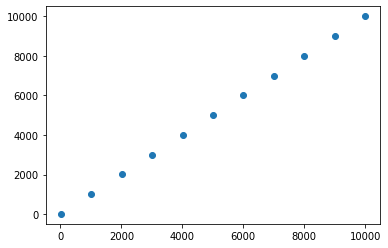

In [45]:
#x - range 12
npts = 11
xlow = 10
xhigh = 10000

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

plt.plot(xi,yi,'o')

Coefficients (from curve_fit)
[-0.1220778   1.00002187]
Covariance Matrix (from curve_fit)
[[ 3.47298610e-03 -4.96253016e-07]
 [-4.96253016e-07  9.91606447e-11]]

Final Result: y = (1.00 +/- 0.00) x + (-0.12 +/- 0.06)


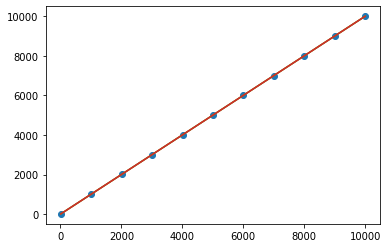

In [46]:
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')

In [47]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,1.000022,0.00001,-0.122078,0.058932


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

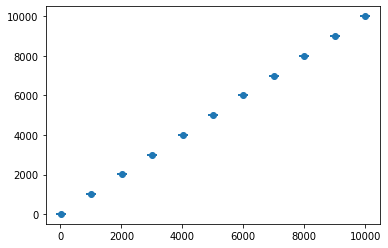

In [48]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

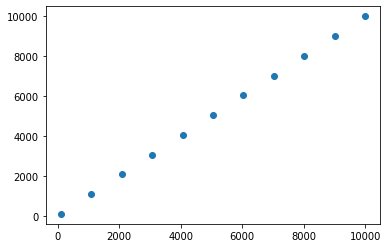

In [49]:
#x - range 13
npts = 11
xlow = 100
xhigh = 10000

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

plt.plot(xi,yi,'o')

Coefficients (from curve_fit)
[0.08903402 0.99999454]
Covariance Matrix (from curve_fit)
[[ 1.44358683e-02 -2.06439292e-06]
 [-2.06439292e-06  4.08750484e-10]]

Final Result: y = (1.00 +/- 0.00) x + (0.09 +/- 0.12)


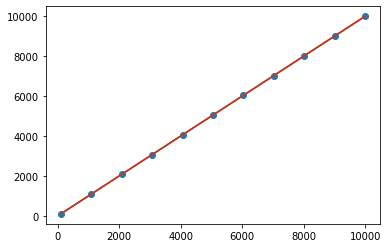

In [50]:
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')

In [51]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,0.999995,0.00002,0.089034,0.120149


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

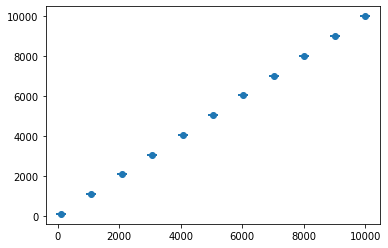

In [52]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

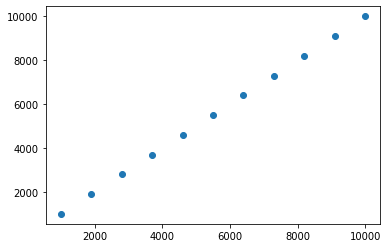

In [53]:
#x - range 14
npts = 11
xlow = 1000
xhigh = 10000

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

plt.plot(xi,yi,'o')

Coefficients (from curve_fit)
[-0.11070287  1.00003646]
Covariance Matrix (from curve_fit)
[[ 1.36664683e-02 -1.95945928e-06]
 [-1.95945928e-06  3.56268489e-10]]

Final Result: y = (1.00 +/- 0.00) x + (-0.11 +/- 0.12)


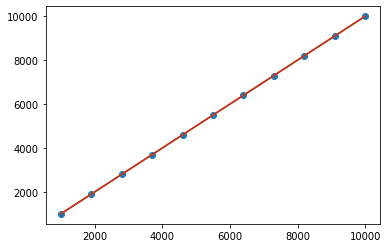

In [54]:
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')

In [55]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,1.000036,0.000019,-0.110703,0.116904


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

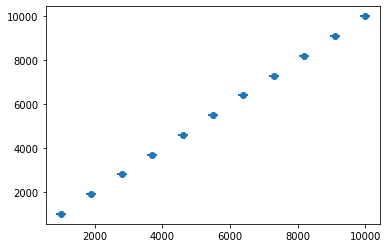

In [56]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

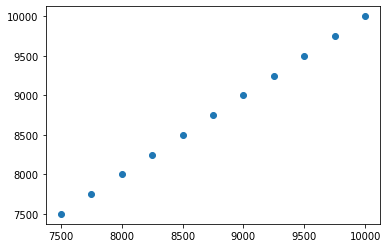

In [57]:
#x - range 15
npts = 11
xlow = 7500
xhigh = 10000

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

plt.plot(xi,yi,'o')

Coefficients (from curve_fit)
[0.05927696 0.99999788]
Covariance Matrix (from curve_fit)
[[ 2.10112919e-01 -2.38145239e-05]
 [-2.38145239e-05  2.72120913e-09]]

Final Result: y = (1.00 +/- 0.00) x + (0.06 +/- 0.46)


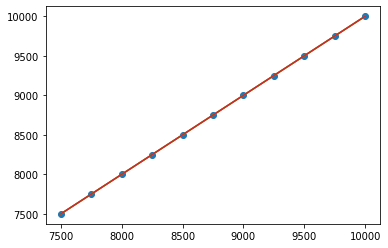

In [58]:
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')

In [59]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,0.999998,0.000052,0.059277,0.458381


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

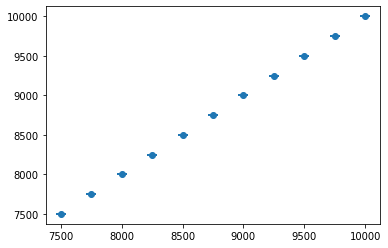

In [60]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

As the x maximum value gets larger the uncertainty value of the y intercept generally gets lower. The y intercept uncertainty will also go up as the x minimum value gets further away from zero. The best way to perform the fit with the lowest y intercept uncertainty would be to have a close x minimum value to zero and a large value of x maximum.

## Question 2 - Why is it cold?

Modify the Jupyter Notebook called GlobalTemperatures.ipynb to consider the temperature variations over the year for five locations - two in the northern hemisphere, one near the equator, and two in the southern hemisphere.  Do not use any of the same locations already considered.

What are the scale factors and offsets required to give a reasonable fit in each case?

In [61]:
# save this as Sun.py

import datetime
import numpy as np

class Sun:

    def getSunriseTime( self, coords ):
        return self.calcSunTime( coords, True )

    def getSunsetTime( self, coords ):
        return self.calcSunTime( coords, False )

    def getCurrentUTC( self ):
        now = datetime.datetime.now()
        return [ now.day, now.month, now.year ]

    def calcSunTime( self, coords, isRiseTime, zenith = 90.8 ):

        # isRiseTime == False, returns sunsetTime

        day, month, year = self.getCurrentUTC()
        #print (day,month,year)

        longitude = coords['longitude']
        latitude = coords['latitude']

        TO_RAD = np.pi/180

        ##1. first calculate the day of the year
        #N1 = math.floor(275 * month / 9)
        #N2 = math.floor((month + 9) / 12)
        #N3 = (1 + math.floor((year - 4 * math.floor(year / 4) + 2) / 3))
        #N = N1 - (N2 * N3) + day - 30

	# EJB:  Modify to calculate the times for all days of the year!!
        N = np.array([i for i in range(1,366)])

        #2. convert the longitude to hour value and calculate an approximate time
        lngHour = longitude / 15

        if isRiseTime:
            t = N + ((6 - lngHour) / 24)
        else: #sunset
            t = N + ((18 - lngHour) / 24)

        #3. calculate the Sun's mean anomaly
        M = (0.9856 * t) - 3.289

        #4. calculate the Sun's true longitude
        L = M + (1.916 * np.sin(TO_RAD*M)) + (0.020 * np.sin(TO_RAD * 2 * M)) + 282.634
        L = self.forceRange( L, 360 ) #NOTE: L adjusted into the range [0,360)

        #5a. calculate the Sun's right ascension

        RA = (1/TO_RAD) * np.arctan(0.91764 * np.tan(TO_RAD*L))
        RA = self.forceRange( RA, 360 ) #NOTE: RA adjusted into the range [0,360)

        #5b. right ascension value needs to be in the same quadrant as L
        Lquadrant  = (np.floor( L/90)) * 90
        RAquadrant = (np.floor(RA/90)) * 90
        RA = RA + (Lquadrant - RAquadrant)

        #5c. right ascension value needs to be converted into hours
        RA = RA / 15

        #6. calculate the Sun's declination
        sinDec = 0.39782 * np.sin(TO_RAD*L)
        cosDec = np.cos(np.arcsin(sinDec))

        #7a. calculate the Sun's local hour angle
        cosH = (np.cos(TO_RAD*zenith) - (sinDec * np.sin(TO_RAD*latitude))) / (cosDec * np.cos(TO_RAD*latitude))

        #if cosH > 1:
        #    return {'status': False, 'msg': 'the sun never rises on this location (on the specified date)'}

        #if cosH < -1:
        #    return {'status': False, 'msg': 'the sun never sets on this location (on the specified date)'}

        #7b. finish calculating H and convert into hours

        if isRiseTime:
            H = 360 - (1/TO_RAD) * np.arccos(cosH)
        else: #setting
            H = (1/TO_RAD) * np.arccos(cosH)

        H = H / 15

        #8. calculate local mean time of rising/setting
        T = H + RA - (0.06571 * t) - 6.622

        #9. adjust back to UTC
        UT = T - lngHour
        #print (UT)
        UT = self.forceRange( UT, 24) # UTC time in decimal format (e.g. 23.23)
        #print (UT)

        #10. Return
        #hr = self.forceRange(UT, 24)
        #min = ((UT - UT.astype(int))*60,0)

        return {
            'status': True,
            'decimal': UT
            #'hr': hr,
            #'min': min 
        }

    def forceRange( self, v, max ):
        # force v to be >= 0 and < max
        for i in range(len(v)):
            if v[i] < 0:
                v[i] = v[i] + max
            elif v[i] >= max:
                v[i] = v[i] - max
        return v

41.8781
38.9586
0.0356
-33.9249
-37.8136


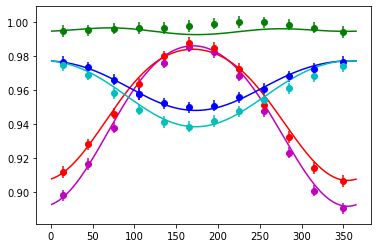

In [62]:
# Number of days in the sidereal year
daysPerYear = 365.256363

# Array to hold day of year

dayOfYear = np.array([i for i in range(1,366)])

# Earth-Sun Distance in A.U.
rES=1.0-0.01672*np.cos(2.0*np.pi/daysPerYear*(dayOfYear-4))
relPower=1/rES**2

# plt.plot(dayOfYear,relPower,'.')


def angleCalc(latitude):
  # tilt angle of the earth in 2020
  tiltAngle = -23.44*np.pi/180.0
  angle = tiltAngle*np.cos(2.0*np.pi/daysPerYear*(dayOfYear+10))
  
  print(latitude)
  return latitude*np.pi/180.0 - angle

# LOCATIONS
statsChicago = {"coords": {'longitude': -87.6298, 'latitude': 41.8781}, 'angle': angleCalc(41.8781)}
statsReston = {'coords': {'longitude': -77.3570, 'latitude': 38.9586}, 'angle': angleCalc(38.9586)}
statsMapaca = {'coords': {'longitude': -51.0705, 'latitude': 0.0356}, 'angle': angleCalc(0.0356)}
statsCapeTown = {'coords': {'longitude': 18.4241, 'latitude': -33.9249}, 'angle': angleCalc(-33.9249)}
statsMelbourne = {'coords': {'longitude': 144.9631, 'latitude': -37.8136}, 'angle': angleCalc(-37.8136)}


#from Sun import Sun

coords = statsChicago["coords"]
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
statsChicago['lengthCorrection'] = dayLength/12.0


coords = statsReston["coords"]
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
statsReston['lengthCorrection'] = dayLength/12.0


coords = statsMapaca["coords"]
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
statsMapaca['lengthCorrection'] = dayLength/12.0


coords = statsCapeTown["coords"]
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
statsCapeTown['lengthCorrection'] = dayLength/12.0


coords = statsMelbourne["coords"]
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
statsMelbourne['lengthCorrection'] = dayLength/12.0


statsChicago["tempTheory"] = (np.cos(statsChicago['angle'])*relPower*np.sqrt(statsChicago['lengthCorrection']))
statsReston["tempTheory"] = (np.cos(statsReston['angle'])*relPower*np.sqrt(statsReston['lengthCorrection']))
statsMapaca["tempTheory"] = (np.cos(statsMapaca['angle'])*relPower*np.sqrt(statsMapaca['lengthCorrection']))
statsCapeTown["tempTheory"] = (np.cos(statsCapeTown['angle'])*relPower*np.sqrt(statsCapeTown['lengthCorrection']))
statsMelbourne["tempTheory"] = (np.cos(statsMelbourne['angle'])*relPower*np.sqrt(statsMelbourne['lengthCorrection']))


statsChicago['temp'] = np.array([-5,-2.7,2.8,	9.2,	15.2,	20.7,	23.5,	22.6	,18.4,	12.1,	4.8	,-1.9])+273.15 
statsReston['temp'] = np.array([	-0.2,	1.4	,6.3,	11.7,	17	,21.8	,24.2	,23.3	,19.6	,13.2,	7.6,	2.1])+273.15 
statsMapaca['temp'] = np.array([26.1,	26.3,	26.4,	26.7,	26.8,	26.8,	27.2,	27.6,	27.9,	27.8	,27.4	,26.9])+273.15 
statsCapeTown['temp'] = np.array([20.9,	20.9,	19.9,	17.7,	15.2,	13.5,	12.8,	13.1,	14.6,	16.1,	18.3,	19.6])+273.15 
statsMelbourne['temp'] = np.array([	20.1,	20.3,	18.6,	15.3,	12.4,	10.2,	9.4,	10.4,	12.1,	14.2,	16.2,	18.3])+273.15 

error = np.array([1 for i in range(12)])


normalization = max([np.amax(statsChicago['temp']),
                     np.amax(statsReston['temp']),
                     np.amax(statsMapaca['temp']),
                     np.amax(statsCapeTown['temp']),
                     np.amax(statsMelbourne['temp'])]) 


# Normalize Temperatures between 0 and 1
statsChicago['temp'] /= normalization
statsReston['temp'] /= normalization
statsMapaca['temp'] /= normalization
statsCapeTown['temp'] /= normalization
statsMelbourne['temp'] /= normalization
error = error/normalization

month = np.array([(15+30*(i-2)) for i in range(1,13)])
for i in range(len(month)):
    if month[i]<0:
        month[i]=month[i]+365

plt.errorbar(month,statsChicago['temp'],yerr=error,fmt='mo')
plt.errorbar(month,statsReston['temp'],yerr=error,fmt='ro')
plt.errorbar(month,statsMapaca['temp'],yerr=error,fmt='go')
plt.errorbar(month,statsCapeTown['temp'],yerr=error,fmt='bo')
plt.errorbar(month,statsMelbourne['temp'],yerr=error,fmt='co')

plt.plot(dayOfYear,(statsChicago['tempTheory']-1)/7+.981,'m')
plt.plot(dayOfYear,(statsReston['tempTheory']-1)/8+.979,'r')
plt.plot(dayOfYear,(statsMapaca['tempTheory']-1)/31+.996,'g')
plt.plot(dayOfYear,(statsCapeTown['tempTheory']-1)/22+.972,'b')
plt.plot(dayOfYear,(statsMelbourne['tempTheory']-1)/18+.971,'c')

Scale Factor with Offset

*  Chicago 7+.981
*  Reston 8+.979
*  Mapaca 31+.996
*  Cape Town 22+.972
*  Melbourne 18+.971



## Question 3 - Kater's Pendulum

Begin with the example Jupyter Notebook called KaterPendulum.ipynb.  Carry out a full analysis of the data obtained in the subdirectory called ~/KaterPendulum/data/scan2.  The file in this directory called kater_scan2_c2.dat will tell you what the x-positions of the small mass were (they are slightly different than in the example we covered in class).

Think about how to "clean" the raw data before proceeding with the fits.

What value of g is the "best" value for this data?  What value of the "fudge factor" offset gives the best comparison of the theory to the data? Is this a reasonable offset?

In [63]:
#  position of small mass (in cm)
xpos = np.array([1.045,2.044,3.012,4.012,5.061,6.011,7.044])
dxpos = np.array([0.003 for i in range(len(xpos))])



Periodup = 1.99644 +/- 0.00000821
Perioddown = 1.99350 +/- 0.00000855
Periodup = 1.99940 +/- 0.00000790
Perioddown = 1.99729 +/- 0.00000951
Periodup = 2.00225 +/- 0.00000704
Perioddown = 2.00111 +/- 0.00000879
Periodup = 2.00538 +/- 0.00000830
Perioddown = 2.00522 +/- 0.00000694
Periodup = 2.00853 +/- 0.00000815
Perioddown = 2.00923 +/- 0.00000776
Periodup = 2.01135 +/- 0.00000904
Perioddown = 2.01295 +/- 0.00000695
Periodup = 2.01496 +/- 0.00000739
Perioddown = 2.01722 +/- 0.00000901


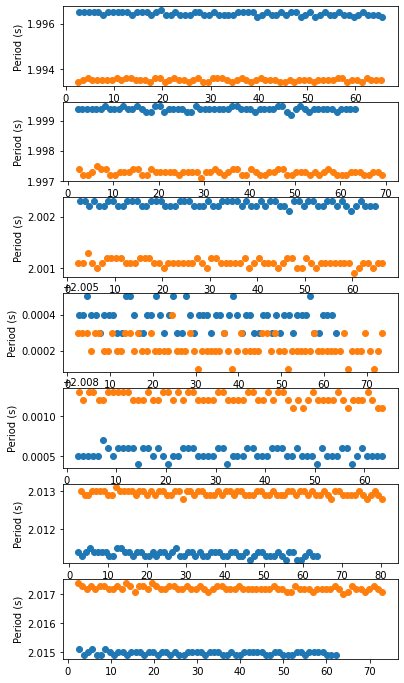

In [65]:
prefix = 'kater_2_run'
suffix = '.txt'

tup = []
tdown = []
dtup = []
dtdown = []

# Generate the figure and the axes 
fig, axs = plt.subplots(nrows=7, ncols=1, figsize=(6,12)) 

for i in range(1,8):
    i2 = 2*i
    j = 2*i - 1
    fname1 = prefix + str(i2) + suffix
    fname2 = prefix + str(j) + suffix

    dfup = pd.read_csv(fname1,sep='\t')
    dfdown = pd.read_csv(fname2,sep='\t')
    
    timeup = np.array(dfup['Time'])
    periodup = []
    for k in range(2,len(timeup)):
        periodup.append(timeup[k]-timeup[k-2])
    
    periodup=np.array(periodup)

    semup = periodup.std()/np.sqrt(len(periodup))
    print ("Periodup = %0.5f +/- %0.8f" % (periodup.mean(),semup))
    
    tup.append(periodup.mean())
    dtup.append(semup)
    
    timedown = np.array(dfdown['Time'])
    perioddown = []
    for k in range(2,len(timedown)):
        perioddown.append(timedown[k]-timedown[k-2])
    
    perioddown=np.array(perioddown)

    semdown = perioddown.std()/np.sqrt(len(perioddown))
    print ("Perioddown = %0.5f +/- %0.8f" % (perioddown.mean(),semdown))
    
    tdown.append(perioddown.mean())
    dtdown.append(semup)

    axs[i-1].plot(timeup[2:],periodup,'o')
    axs[i-1].plot(timedown[2:],perioddown,'o')
    axs[i-1].set_ylabel('Period (s)')
    
tup = np.array(tup)
tdown = np.array(tdown)
dtup = np.array(dtup)
dtdown = np.array(dtdown)

plt.show()

In [66]:
up = pd.DataFrame({'Xpos':xpos, 'Period':tup, 'dXpos':dxpos, 'dPeriod':dtup})
down = pd.DataFrame({'Xpos':xpos, 'Period':tdown, 'dXpos':dxpos, 'dPeriod':dtdown})

Coefficients (from curve_fit)
[1.99350442e+00 2.80858978e-03 3.17652678e-05]
Covariance Matrix (from curve_fit)
[[ 3.44064474e-08 -1.80812150e-08  1.99607107e-09]
 [-1.80812150e-08  1.10498147e-08 -1.30715053e-09]
 [ 1.99607107e-09 -1.30715053e-09  1.61683442e-10]]
Coefficients (from curve_fit)
[1.98942806e+00 3.85342244e-03 1.23215841e-05]
Covariance Matrix (from curve_fit)
[[ 2.32017152e-08 -1.21925481e-08  1.34595622e-09]
 [-1.21925481e-08  7.45091723e-09 -8.81394001e-10]
 [ 1.34595622e-09 -8.81394001e-10  1.09018871e-10]]


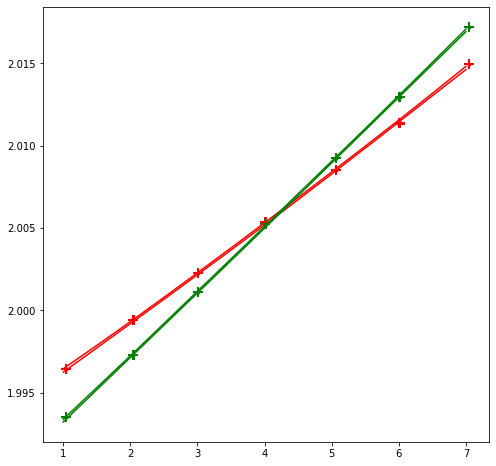

In [67]:
# Let's do linear fits using the curve_fit utility from scipy

from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x + paramlist[2]*x*x

init_vals = [0.0 for x in range(3)]
x = np.array(up['Xpos'])
y = np.array(up['Period'])
poptu, pcovu = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptu,pcovu,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
loweru = np.percentile(ysample,16.0,axis=0)
upperu = np.percentile(ysample,84.0,axis=0)
middleu = (loweru+upperu)/2.0

print("Coefficients (from curve_fit)")
print (poptu)
print("Covariance Matrix (from curve_fit)")
print (pcovu)

init_vals = [0.0 for x in range(3)]
x = np.array(down['Xpos'])
y = np.array(down['Period'])
poptd, pcovd = curve_fit(fitfunction,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptd,pcovd,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lowerd = np.percentile(ysample,16.0,axis=0)
upperd = np.percentile(ysample,84.0,axis=0)
middled = (lowerd+upperd)/2.0

print("Coefficients (from curve_fit)")
print (poptd)
print("Covariance Matrix (from curve_fit)")
print (pcovd)

fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 

axs2.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='r.',capsize=5, capthick=2)
axs2.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='g.',capsize=5, capthick=2)

#axs2.plot(xi,middleu)
axs2.plot(xi,loweru,'r')
axs2.plot(xi,upperu,'r')

#axs2.plot(xi,middle)
axs2.plot(xi,lowerd,'g')
axs2.plot(xi,upperd,'g')

#axs2.set_xlim(3.8,4.3)
#axs2.set_ylim(2.003,2.006)

plt.show()


In [68]:
tmin = []
for i in range(len(xi)):
    if loweru[i] < upperd[i]:
        tmin.append(loweru[i])
tmin = np.array(tmin)
tmin = tmin.min()

tmax = []
for i in range(len(xi)):
    if upperu[i] > lowerd[i]:
        tmax.append(upperu[i])
tmax = np.array(tmax)
tmax = tmax.max()

tbar = (tmax+tmin)/2.0
dtbar = (tmax-tmin)/2.0

print ("Period = %0.5f +/- %0.5f" % (tbar,dtbar))

Period = 2.00597 +/- 0.00048


In [69]:
length = 0.9986
dlength = 0.00005

g = 4*np.pi**2*length/tbar**2
dg = g*np.sqrt((dlength/length)**2+(2*dtbar/tbar)**2)

print ("g = %0.4f +/- %0.4f" % (g,dg))

g = 9.7973 +/- 0.0047


In [70]:
# Measured distances and masses
M=1.35928 # large mass
m=0.72705 # small mass
Mbar=2.90 # mass of bar (with small and large masses removed)
D=0.9986 # distance between knife-edge pivot points
L=1.523  # length of bar
#
#g = 9.799 # value of g in Newport News
g = 9.8144

# Distance calculations
#
# The distance between the knife edge pivot and the lower edge of the large mass is 1.35 cm
# The distance between the knife edge pivot and the lower edge of the large mass is 1.04 cm
# The radius of the large mass is 4.753 cm
# The radius of the small mass is 3.498 cm
RM = 0.04753
Rm = 0.03498
offsetM = 0.0135
offsetm = 0.0104
l1=D/2.0+RM+offsetM

# Find the value of x that satisfies the equation above

diff = 1.0E+99
olddiff = 1.0E+99
l2 = []
xpos = []
t1 = []
t2 = []
for i in range(1000):
    l2.append(D/2.0+Rm+(i/1000.0)*.12)
    xpos.append((l2[i]-offsetm-D/2-Rm-0.0000)*100) # distance from the small mass to the knife-edge, in cm.
    x=(M*l1-m*l2[i])/(M+m+Mbar)
    h2=D/2.0+x
    h1=D/2.0-x
    lhs=h1*h2;
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2[i]+x)*(l2[i]+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    diff = lhs-rhs
    if (np.abs(diff)<olddiff):
        olddiff=diff
        index=i
    t1.append(2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1)))
    t2.append(2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2)))
    
#print (l2,t1,t2)

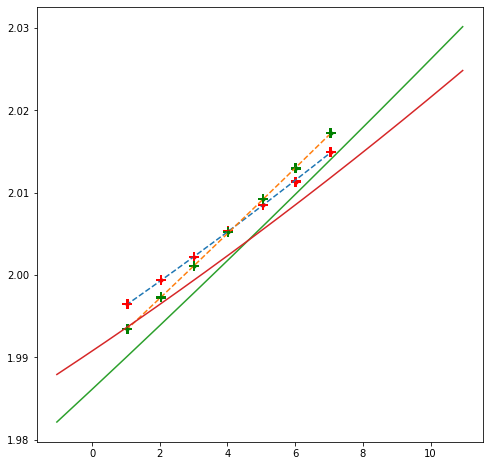

In [71]:
fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 

axs2.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='r.',capsize=5, capthick=2)
axs2.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='g.',capsize=5, capthick=2)

axs2.plot(xi,middleu,'--')
#axs2.plot(xi,loweru,'r')
#axs2.plot(xi,upperu,'r')

axs2.plot(xi,middled,'--')
#axs2.plot(xi,lowerd,'g')
#axs2.plot(xi,upperd,'g')

#axs2.set_xlim(3.8,4.3)
#axs2.set_ylim(2.003,2.006)

axs2.plot(xpos,t1,label='Small Mass Down')
axs2.plot(xpos,t2,label='Small Mass Up')

plt.show()

Coefficients (from curve_fit)
[9.78012653]
Covariance Matrix (from curve_fit)
[[5.35212055e-05]]
Coefficients (from curve_fit)
[9.78847439]
Covariance Matrix (from curve_fit)
[[5.49601027e-05]]


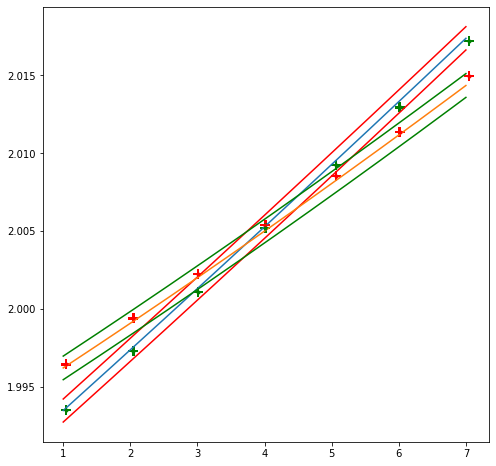

In [74]:
def theoryfitfunction1(xdata,*paramlist):
    
    M=1.35928 # large mass
    m=0.72705 # small mass
    Mbar=2.90 # mass of bar (with small and large masses removed)
    D=0.9986 # distance between knife-edge pivot points
    L=1.523  # length of bar
    
    g = paramlist[0]
    #fudge_factor = paramlist[1]
    fudge_factor=0.0000

    # Distance calculations
    #
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.35 cm
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.04 cm
    # The radius of the large mass is 4.753 cm
    # The radius of the small mass is 3.498 cm
    RM = 0.04753
    Rm = 0.03498
    offsetM = 0.0135
    offsetm = 0.0104
    l1=D/2.0+RM+offsetM
    
    l2 = D/2.0+Rm+offsetm+xdata/100.0+fudge_factor
    x=(M*l1-m*l2)/(M+m+Mbar)
    
    h2=D/2.0+x
    h1=D/2.0-x
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2+x)*(l2+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    
    t1 = 2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1))
    t2 = 2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2))
    
    return t1

def theoryfitfunction2(xdata,*paramlist):
    
    M=1.35928 # large mass
    m=0.72705 # small mass
    Mbar=2.90 # mass of bar (with small and large masses removed)
    D=0.9986 # distance between knife-edge pivot points
    L=1.523  # length of bar
    
    g = paramlist[0]
    #fudge_factor = paramlist[1]
    fudge_factor=0.0000

    # Distance calculations
    #
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.35 cm
    # The distance between the knife edge pivot and the lower edge of the large mass is 1.04 cm
    # The radius of the large mass is 4.753 cm
    # The radius of the small mass is 3.498 cm
    RM = 0.04753
    Rm = 0.03498
    offsetM = 0.0135
    offsetm = 0.0104
    l1=D/2.0+RM+offsetM
    
    l2 = D/2.0+Rm+offsetm+xdata/100.0+fudge_factor
    x=(M*l1-m*l2)/(M+m+Mbar)
    
    h2=D/2.0+x
    h1=D/2.0-x
    Icm=1.0/12.0*Mbar*L*L+Mbar*x*x+M*(l1-x)*(l1-x)+m*(l2+x)*(l2+x)+1/2.0*m*Rm**2 + 1.0/2*M*RM**2
    rhs=Icm/(M+m+Mbar)
    
    t1 = 2*np.pi*np.sqrt((h1*h1+rhs)/(g*h1))
    t2 = 2*np.pi*np.sqrt((h2*h2+rhs)/(g*h2))
    
    return t2

init_vals = [9.814]
x = np.array(up['Xpos'])
y = np.array(up['Period'])
poptu, pcovu = curve_fit(theoryfitfunction1,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptu,pcovu,10000)
ysample=np.asarray([theoryfitfunction1(xi,*pi) for pi in ps])
loweru = np.percentile(ysample,16.0,axis=0)
upperu = np.percentile(ysample,84.0,axis=0)
middleu = (loweru+upperu)/2.0

print("Coefficients (from curve_fit)")
print (poptu)
print("Covariance Matrix (from curve_fit)")
print (pcovu)

init_vals = [9.814]
x = np.array(down['Xpos'])
y = np.array(down['Period'])
poptd, pcovd = curve_fit(theoryfitfunction2,x,y,p0=init_vals)

#xi = np.linspace(np.min(x),np.max(x),100)
xi = np.linspace(1,7,1000)
ps = np.random.multivariate_normal(poptd,pcovd,10000)
ysample=np.asarray([theoryfitfunction2(xi,*pi) for pi in ps])
lowerd = np.percentile(ysample,16.0,axis=0)
upperd = np.percentile(ysample,84.0,axis=0)
middled = (lowerd+upperd)/2.0

print("Coefficients (from curve_fit)")
print (poptd)
print("Covariance Matrix (from curve_fit)")
print (pcovd)

fig2, axs2 = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 

axs2.errorbar(up.Xpos,up.Period,yerr=up.dPeriod,xerr=up.dXpos,fmt='r.',capsize=5, capthick=2)
axs2.errorbar(down.Xpos,down.Period,yerr=down.dPeriod,xerr=down.dXpos,fmt='g.',capsize=5, capthick=2)

axs2.plot(xi,middleu)
axs2.plot(xi,loweru,'r')
axs2.plot(xi,upperu,'r')

axs2.plot(xi,middled)
axs2.plot(xi,lowerd,'g')
axs2.plot(xi,upperd,'g')

#axs2.set_xlim(3.8,4.3)
#axs2.set_ylim(2.003,2.006)

plt.show()



In [75]:
tmin = []
for i in range(len(xi)):
    if loweru[i] < upperd[i]:
        tmin.append(loweru[i])
tmin = np.array(tmin)
tmin = tmin.min()

tmax = []
for i in range(len(xi)):
    if upperu[i] > lowerd[i]:
        tmax.append(upperu[i])
tmax = np.array(tmax)
tmax = tmax.max()

tbar = (tmax+tmin)/2.0
dtbar = (tmax-tmin)/2.0

print ("Period = %0.5f +/- %0.5f" % (tbar,dtbar))
            

Period = 2.00544 +/- 0.01269


In [76]:
length = 0.9986
dlength = 0.00005

g = 4*np.pi**2*length/tbar**2
dg = g*np.sqrt((dlength/length)**2+(2*dtbar/tbar)**2)

print ("g = %0.4f +/- %0.4f" % (g,dg))

g = 9.8024 +/- 0.1240
